<a href="https://colab.research.google.com/github/Yuxi-Cn/Personal_Loan_Modelling/blob/main/MLmodel_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Loading**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from datetime import datetime
%matplotlib inline

At this point, we will use the data that has been prepared for modeling from the SVM modeling work.

In [2]:
df = pd.read_csv('df_prepared.csv')

In [3]:
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0,Los Angeles County,34.1620,-118.0894
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0,Los Angeles County,34.0218,-118.2883
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0,Alameda County,37.8746,-122.2547
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0,San Francisco County,37.7217,-122.4446
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1,Los Angeles County,34.2429,-118.5273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,29,3,40,92697,1,22.8,3,0,0,0,0,1,0,Orange County,33.6473,-117.8409
4995,30,4,15,92037,4,4.8,1,85,0,0,0,1,0,San Diego County,32.8668,-117.2482
4996,63,39,24,93023,2,3.6,3,0,0,0,0,0,0,Ventura County,34.5210,-119.2477
4997,65,40,49,90034,3,6.0,2,0,0,0,0,1,0,Los Angeles County,34.0293,-118.3994


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4999 non-null   int64  
 1   Experience          4999 non-null   int64  
 2   Income              4999 non-null   int64  
 3   ZIP Code            4999 non-null   int64  
 4   Family              4999 non-null   int64  
 5   CCAvg               4999 non-null   float64
 6   Education           4999 non-null   int64  
 7   Mortgage            4999 non-null   int64  
 8   Personal Loan       4999 non-null   int64  
 9   Securities Account  4999 non-null   int64  
 10  CD Account          4999 non-null   int64  
 11  Online              4999 non-null   int64  
 12  CreditCard          4999 non-null   int64  
 13  Place               4999 non-null   object 
 14  Latitude            4999 non-null   float64
 15  Longitude           4999 non-null   float64
dtypes: flo

# **2. Feature Vector & Target Variable**

In [5]:
# drop the target column & 'Place' column, which have been quantified with the 'Longitude' and 'Latitude' columns
X = df.drop(['Personal Loan', 'ZIP Code', 'Place'], axis=1)
y = df['Personal Loan']

# **3. Data Splitting**

In [6]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((3999, 13), (1000, 13))

# **4. Feature Scalling**

In [8]:
cols = X_train.columns
# use StandardScaler instead of MinMaxScaler to mitigate the model's sensitivity to outliers
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

# **5. Modelling**

In section 5, we'll build three models **(GaussianNB, KNN, SVM)** to assess their accuracy score and time consumption, so that we can compare their performance later on.

Here, I define a function to plot the learning curve of a machine learning estimator, which evaluates performance using cross-validation scores.

In [9]:
# define learning curve plotting
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## **5.1 Gaussian Naive Bayes (GaussianNB)**

In [10]:
# create dictionaries to store performance data for training and testing phases
results_train = {}
results_test = {}

# create and train the Gaussian Naive Bayes model
model = GaussianNB()

train_start_time = datetime.now()
model.fit(X_train, y_train)
train_end_time = datetime.now()

# predict labels for training and testing data
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# calculate accuracy scores
score_train = accuracy_score(y_train, pred_train)
score_test = accuracy_score(y_test, pred_test)

# calculate training and testing times
GNB_train_time = train_end_time - train_start_time

# test the model
test_start_time = datetime.now()
pred_test = model.predict(X_test)
test_end_time = datetime.now()
GNB_test_time = test_end_time - test_start_time

# store performance data in the dictionary
results_train['GaussianNB'] = (score_train, GNB_train_time)
results_test['GaussianNB'] = (score_test, GNB_test_time)

# print results
print(f'Accuracy of training data: {score_train:.4f}\n')
print(f'Training time: {GNB_train_time}\n\n')

print(f'Accuracy of testing data: {score_test:.4f}\n')
print(f'Testing time: {GNB_test_time}')


Accuracy of training data: 0.8847

Training time: 0:00:00.006645


Accuracy of testing data: 0.8820

Testing time: 0:00:00.001132


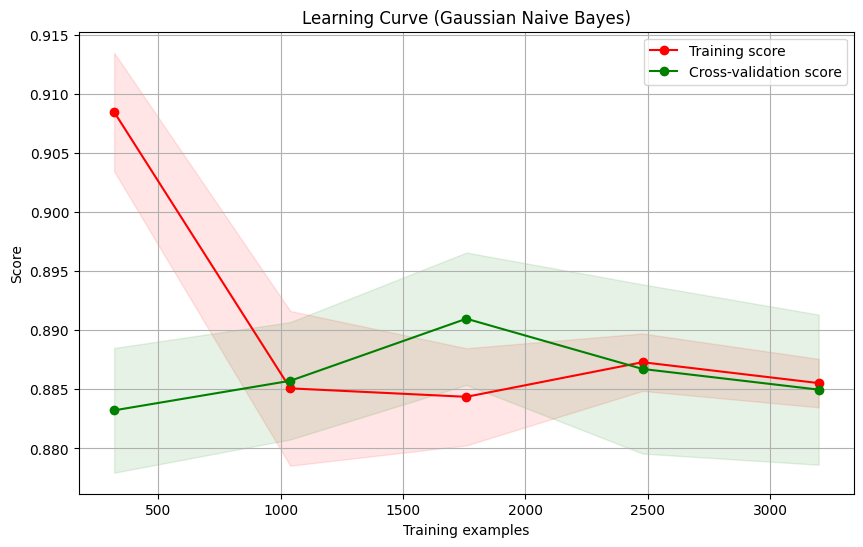

In [11]:
# plot learning curve
plot_learning_curve(model, "Learning Curve (Gaussian Naive Bayes)", X_train, y_train, cv=5)
plt.show()

**Comments**

The accuracy of training and testing data is very close, impling that the model performs well. We then use the learning curve to explore how the accuracy changes during training.

The learning curve shows:

- The training score starts high at around 0.91, presentig a strong fit of the model to the training data. But the training score gradually decreases subsequently. Thus, we can see that, the model's fit to the training data weakens slightly as more data is added.

- The cross-validation (CV) score is higher than the training score after the sample size reaches 1000. This trend illustrates that the model generalises better to unseen data compared to its performance on the training data.

- Despite fluctuations, both training and CV scores converge to similar values from 2500 samples onwards. So, we conclude that there is a consistent level of performance achieved by the model.

## **5.2 K-Nearest Neighbors (KNN)**

In [12]:
# define the KNN model
model = KNeighborsClassifier()

# cross-validation to evaluate model performance
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# train the model with early stopping
best_score = 0
best_model = None
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_model = model
    else:
        # early stopping: stop training if performance starts to degrade
        break

# calculate training time
train_start_time = datetime.now()
best_model.fit(X_train, y_train)
train_end_time = datetime.now()
train_time = train_end_time - train_start_time

# predict labels for training and testing data
pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)

# calculate accuracy scores
train_score = accuracy_score(y_train, pred_train)
test_score = accuracy_score(y_test, pred_test)

# calculate testing time
test_start_time = datetime.now()
pred_test = best_model.predict(X_test)
test_end_time = datetime.now()
test_time = test_end_time - test_start_time

# print results
print(f'Cross-Validation Mean Score: {cv_scores.mean():.4f}\n\n')
print(f'Training Accuracy: {train_score:.4f}\n')
print(f'Best Accuracy on Testing Data: {best_score:.4f}\n\n')
print(f'Training Time: {train_time}\n')
print(f'Testing Time: {test_time}')


Cross-Validation Mean Score: 0.9535


Training Accuracy: 1.0000

Best Accuracy on Testing Data: 0.9490


Training Time: 0:00:00.006758

Testing Time: 0:00:00.062470


**Comments**

Here, the training accuracy is 1 which sigfies potential overfitting. To address this issue, I attempted to use early stopping and cross-validation techniques. However, the results remained similar, with high training accuracy and noticeable divergence from the testing accuracy.
Method tried:
- Cross-validation is performed using cross_val_score to evaluate the model's performance.
- Early stopping is implemented by monitoring the testing accuracy during model training and stopping the training process if the performance starts to degrade. If the current accuracy is not better than the previous best accuracy, training stops.
- The range of k values from 1 to 20 is tested, and the best performing k is selected based on cross-validation mean score.
- The best model with the highest testing accuracy is selected and evaluated on the testing set.

---

Adding the `p` parameter can help address overfitting by controlling the influence of distant points on the decision boundaries of the KNN model. So, I decided to introduce the `p` parameter and employ grid search to determine if it helps mitigate overfitting.

In [13]:
# define the KNN model
model = KNeighborsClassifier()

# define hyperparameters for tuning
param_grid = {'n_neighbors': range(1, 21), 'p': [1, 2, 3]}

# perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# calculate training time
train_start_time = datetime.now()
best_model.fit(X_train, y_train)
train_end_time = datetime.now()
KNN_train_time = train_end_time - train_start_time

# predict labels for training and testing data
pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)

# calculate accuracy scores
train_score = accuracy_score(y_train, pred_train)
test_score = accuracy_score(y_test, pred_test)

# calculate testing time
test_start_time = datetime.now()
pred_test = best_model.predict(X_test)
test_end_time = datetime.now()
KNN_test_time = test_end_time - test_start_time

# store performance data in the dictionary
results_train['KNN'] = (train_score, KNN_train_time)
results_test['KNN'] = (test_score, KNN_test_time)

# print results
print(f'Best Parameters Found: {best_params}\n')
print(f'Training Accuracy: {train_score:.4f}\n')
print(f'Best Accuracy on Testing Data: {test_score:.4f}\n\n')
print(f'Training Time: {KNN_train_time}\n')
print(f'Testing Time: {test_time}')


Best Parameters Found: {'n_neighbors': 5, 'p': 3}

Training Accuracy: 0.9660

Best Accuracy on Testing Data: 0.9470


Training Time: 0:00:00.005692

Testing Time: 0:00:00.062470


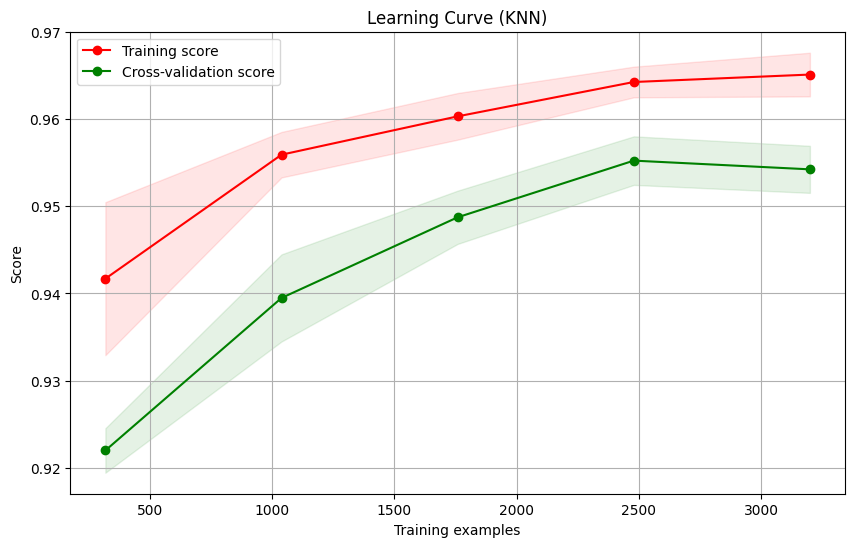

In [14]:
# plot learning curve
plot_learning_curve(best_model, "Learning Curve (KNN)", X_train, y_train, cv=5)
plt.show()

**Comments**
- Parameter Adjustment: Adding the `p` parameter in KNN through grid search aids in addressing overfitting by fine-tuning the distance metric.
- Learning Curve Analysis: With the optimal parameter found, the learning curve depicts a narrowing gap between training and cross-validation scores. Both scores gradually increase and flatten from 2500 samples onwards.
- Testing Accuracy: The best accuracy on testing data reaches 0.9470 which shows the effectiveness of the chosen parameter.
- Summary: Adjusting hyperparameters like `p` in KNN via regularisation techniques simplifies models, enhances generalisation to unseen data, and mitigates overfitting. This optimisation, along with cross-validation, achieves a balanced trade-off between bias and variance, resulting in better model performance.

Note: In the context of KNN, the p parameter represents the power parameter for the Minkowski distance metric.

## **5.3 Support Vector Machine (SVM)**

In [15]:
# create and train the SVM model with best parameters
svm_model = SVC(C=10, gamma=0.1, kernel='rbf')

train_start_time = datetime.now()
svm_model.fit(X_train, y_train)
train_end_time = datetime.now()

# predict labels for training and testing data
svm_pred_train = svm_model.predict(X_train)
svm_pred_test = svm_model.predict(X_test)

# calculate accuracy scores
svm_score_train = accuracy_score(y_train, svm_pred_train)
svm_score_test = accuracy_score(y_test, svm_pred_test)

# calculate training and testing times
svm_train_time = train_end_time - train_start_time

# test the model
test_start_time = datetime.now()
svm_pred_test = svm_model.predict(X_test)
test_end_time = datetime.now()
svm_test_time = test_end_time - test_start_time

# print results
print(f'Accuracy of training data: {svm_score_train:.4f}\n')
print(f'Training time: {svm_train_time}\n\n')

print(f'Accuracy of testing data: {svm_score_test:.4f}\n')
print(f'Testing time: {svm_test_time}')


Accuracy of training data: 0.9937

Training time: 0:00:00.085631


Accuracy of testing data: 0.9790

Testing time: 0:00:00.017477


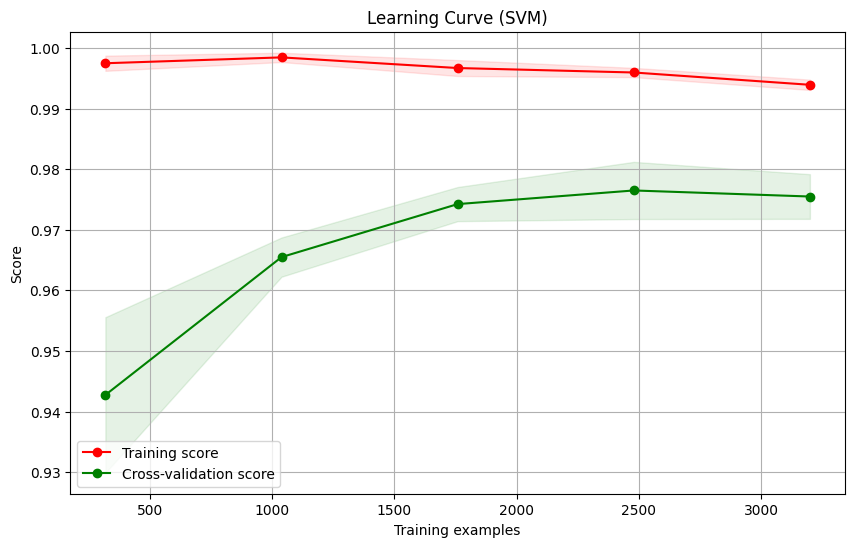

In [16]:
# plot learning curve
plot_learning_curve(svm_model, "Learning Curve (SVM)", X_train, y_train, cv=5)
plt.show()

**Comments**

In the first try, by using the pre-defined optimal hyperparameters decided in the modeling process, we encounter the same problem again as the extremely high training accuracy score suggests overfitting. The learning curve shows that the training accuracy starts at a point close to 1, which doesn't make sense.

Therefore, considering `C` acts as a regularization parameter, I tried several times to manually change the value of `C` {0.1, 0.5, 1, 5, 10} and evaluated the results based on the learning curve and accuracy. Eventually, the model tends to fit well when `C` = 0.5.


In [17]:
# create and train the SVM model with L2 regularization
svm_model = SVC(C=0.5, gamma=0.1, kernel='rbf')

train_start_time = datetime.now()
svm_model.fit(X_train, y_train)
train_end_time = datetime.now()

# predict labels for training and testing data
pred_train = svm_model.predict(X_train)
pred_test = svm_model.predict(X_test)

# calculate accuracy scores
score_train = accuracy_score(y_train, pred_train)
score_test = accuracy_score(y_test, pred_test)

# calculate training and testing times
SVM_train_time = train_end_time - train_start_time

# test the model
test_start_time = datetime.now()
pred_test = svm_model.predict(X_test)
test_end_time = datetime.now()
SVM_test_time = test_end_time - test_start_time

# store performance data in the dictionary
results_train['SVM'] = (score_train, SVM_train_time)
results_test['SVM'] = (score_test, SVM_test_time)

# print results
print(f'Accuracy of training data: {score_train:.4f}\n')
print(f'Training time: {train_time}\n\n')

print(f'Accuracy of testing data: {score_test:.4f}\n')
print(f'Testing time: {test_time}')


Accuracy of training data: 0.9755

Training time: 0:00:00.006758


Accuracy of testing data: 0.9610

Testing time: 0:00:00.062470


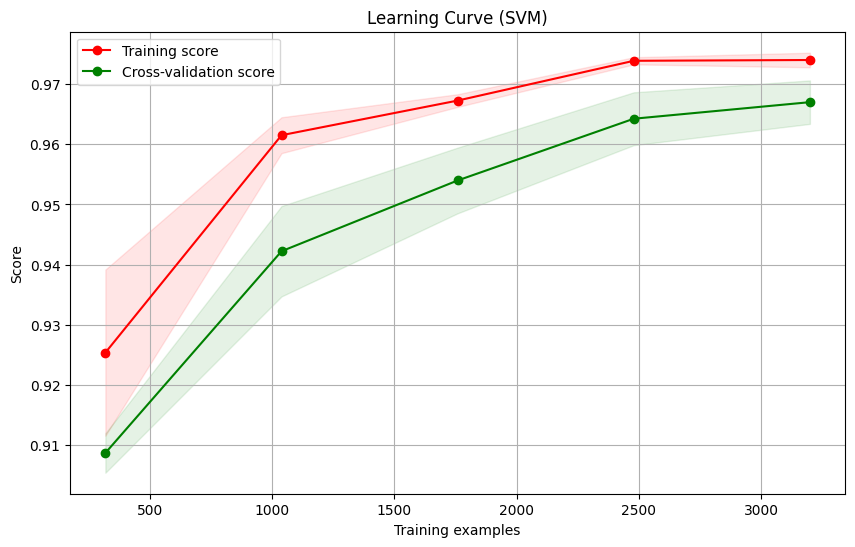

In [19]:
# plot learning curve
plot_learning_curve(svm_model, "Learning Curve (SVM)", X_train, y_train, cv=5)
plt.show()

**Comments**

As shown in the learning curve, the training score starts at approximately 0.925 and the CV score initiates at 0.91. They parallelly climb to around 0.97 and remain steady after achieving 2500 samples. This is a great sign of a well-fitted model performance. Thus, we will use the performance data generated by this model as the output of SVM to proceed to the final step.

# **6. Model Comparison**

In [20]:
# performance on the training set
results_train

{'GaussianNB': (0.8847211802950737, datetime.timedelta(microseconds=6645)),
 'KNN': (0.9659914978744686, datetime.timedelta(microseconds=5692)),
 'SVM': (0.9754938734683671, datetime.timedelta(microseconds=101693))}

In [21]:
# performance on the testing set
results_test

{'GaussianNB': (0.882, datetime.timedelta(microseconds=1132)),
 'KNN': (0.947, datetime.timedelta(microseconds=334452)),
 'SVM': (0.961, datetime.timedelta(microseconds=25200))}

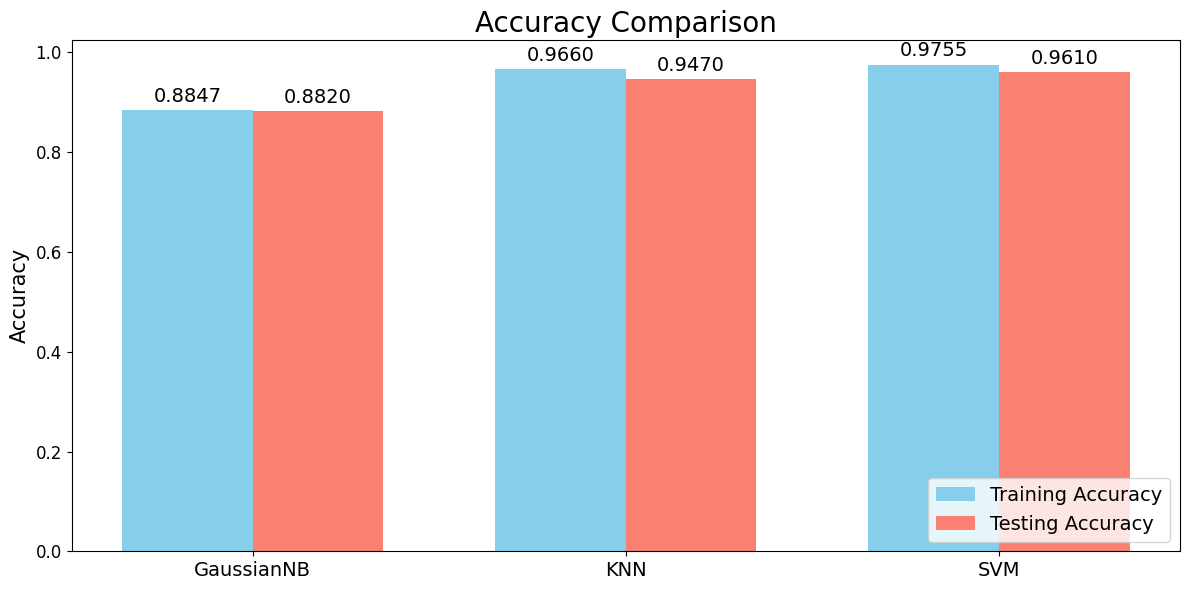

In [22]:
# 3 model names
models = ['GaussianNB', 'KNN', 'SVM']

# extract scores and times for training and testing
train_scores = [results_train[model][0] for model in models]
test_scores = [results_test[model][0] for model in models]

# plot
plt.figure(figsize=(12, 6))

# accuracy comparison
bar_width = 0.35
index = np.arange(len(models))

bars1 = plt.bar(index - bar_width/2, train_scores, bar_width, label='Training Accuracy', color='skyblue')
bars2 = plt.bar(index + bar_width/2, test_scores, bar_width, label='Testing Accuracy', color='salmon')
plt.title('Accuracy Comparison', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, models, fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='lower right', fontsize=14)

# add numbers above the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate('%.4f' % height,
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=14)

# show plot
plt.tight_layout()
plt.show()


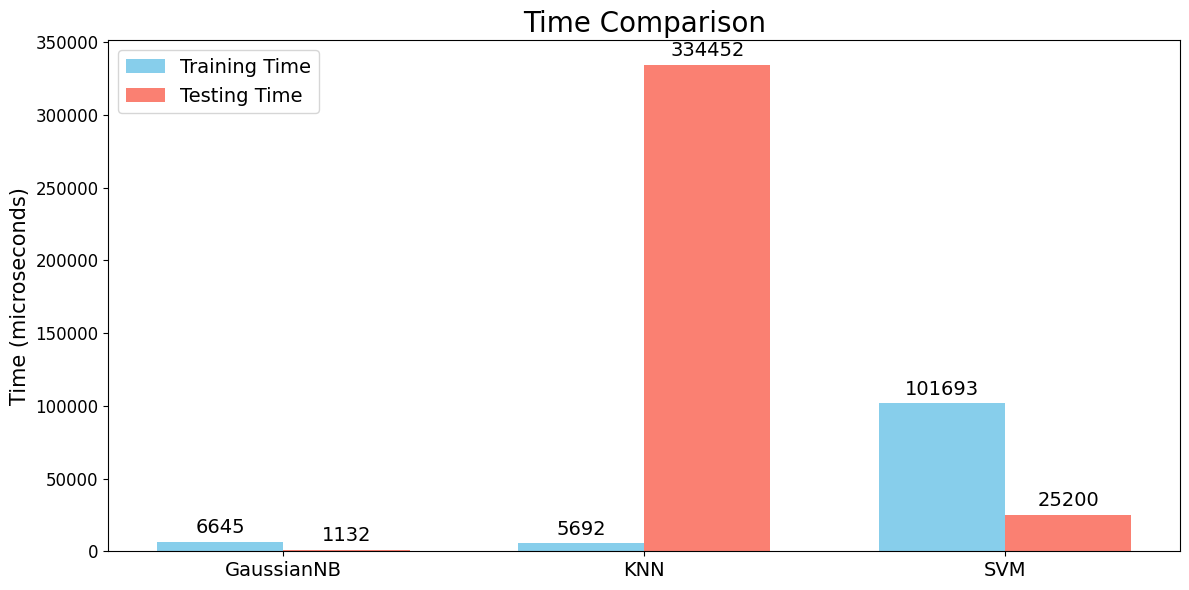

In [23]:
# model names
models = ['GaussianNB', 'KNN', 'SVM']

# extract times for training and testing
train_times = [results_train[model][1].total_seconds() * 1000000 for model in models]
test_times = [results_test[model][1].total_seconds() * 1000000 for model in models]

# plot
plt.figure(figsize=(12, 6))

# time comparison
bar_width = 0.35
index = np.arange(len(models))

bars1 = plt.bar(index - bar_width/2, train_times, bar_width, label='Training Time', color='skyblue')
bars2 = plt.bar(index + bar_width/2, test_times, bar_width, label='Testing Time', color='salmon')
plt.title('Time Comparison', fontsize=20)
plt.ylabel('Time (microseconds)', fontsize=15)
plt.xticks(index, models, fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=14)

# add numbers above the bars
for bars in [bars1, bars2]:
    for bar, time in zip(bars, train_times if bars == bars1 else test_times):
        plt.annotate(f'{time:.0f}',
                     xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=14)

# show plot
plt.tight_layout()
plt.show()


# **7. Results and Conclusion**

- Regarding accuracy scores, we observe a relatively large difference between the training and testing sets in the KNN model. The gap indicates that the model somewhat relies more on the training data and performs slightly poorer on unseen data.

- Overall, SVM achieves the highest accuracy at 0.9610 on the testing set, while it takes the longest time on the training set, approx. 101.69k microseconds. On the other hand, the GaussianNB model takes the least time to complete training and testing but performs the worst in classification accuracy. Notably, the KNN model uses the longest training time, which is over triple the time of SVM's, totaling 334.45k microseconds.

- In summary, considering this comparison, SVM stands out as the preferred method among the three models for classification tasks with our dataset. It achieves the highest accuracy, albeit with longer training times. The only downside is that SVM may require more time for training and tuning, especially when dealing with large datasets.